In [7]:
print("\nMann–Whitney U Test Results:\n")
for col in continuous_vars:
    u_stat, p_val = stats.mannwhitneyu(
        group_improving[col],
        group_worsening[col],
        alternative='two-sided'
    )
    print(f"{col}: U = {u_stat:.4f}, p = {p_val:.4e}")



Mann–Whitney U Test Results:

creatinine_mean: U = 720596.5000, p = 4.8885e-30
creatinine_change: U = 1914853.5000, p = 0.0000e+00
first_creat: U = 1104282.5000, p = 8.4029e-12
last_creat: U = 381203.0000, p = 1.3419e-166
urine_output_mean: U = 1147615.0000, p = 6.6228e-19
recovery_ratio: U = 1920996.0000, p = 0.0000e+00
map_mean: U = 1100072.0000, p = 3.4834e-11
sbp_mean: U = 1062613.0000, p = 1.2558e-06
lactate_mean: U = 826501.0000, p = 2.0197e-10
age: U = 901192.0000, p = 4.8712e-03


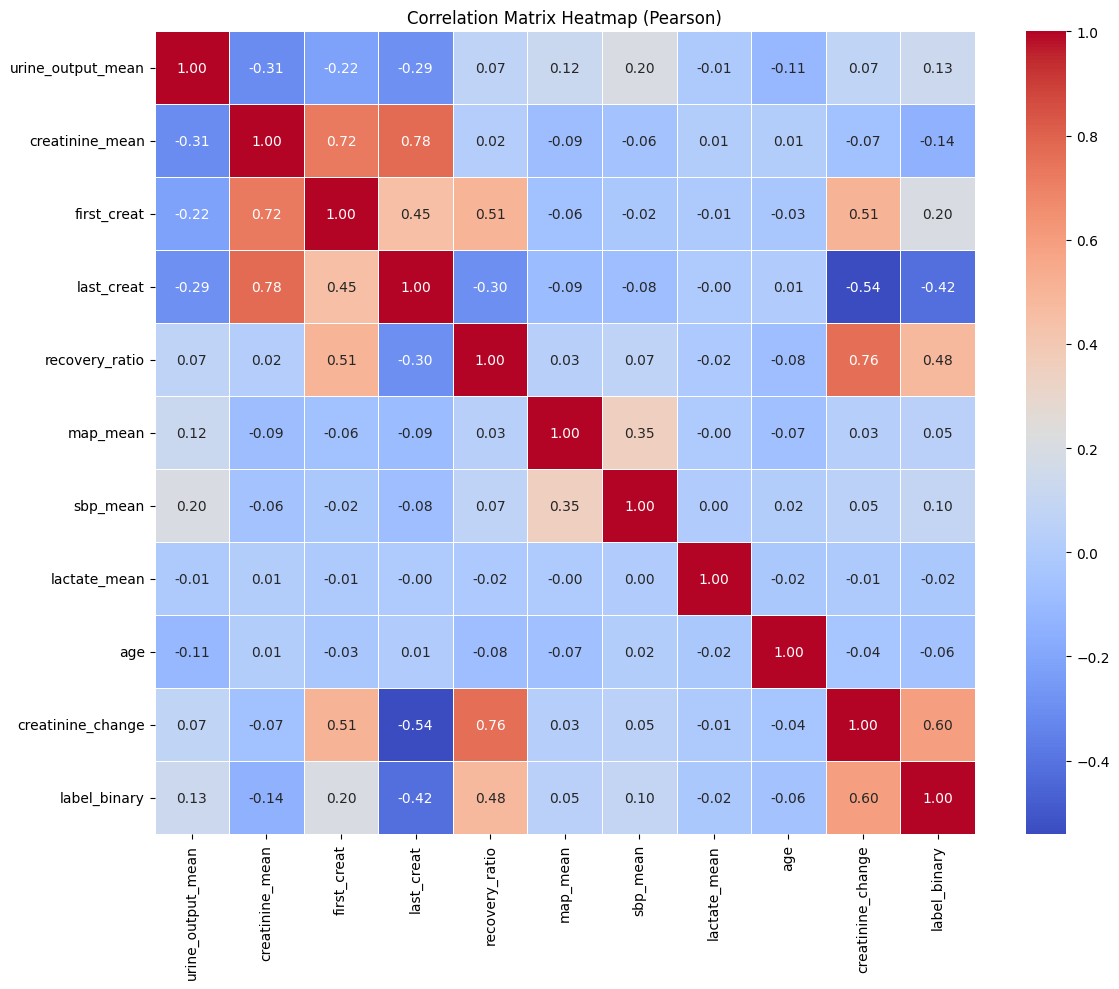

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = [
    'urine_output_mean', 'creatinine_mean', 'first_creat', 'last_creat',
    'recovery_ratio', 'map_mean', 'sbp_mean', 'lactate_mean', 'age',
    'creatinine_change', 'label_binary'
]
corr_matrix = df[numeric_cols].corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix Heatmap (Pearson)")
plt.tight_layout()
plt.show()


In [9]:
df.shape

(2772, 14)

In [10]:
from scipy.stats import pearsonr

target = 'label_binary'

for col in numeric_cols:
    if col != target:
        r, p = pearsonr(df[col], df[target])
        print(f"{col}: r = {r:.4f}, p = {p:.4e}")


urine_output_mean: r = 0.1279, p = 1.3967e-11
creatinine_mean: r = -0.1405, p = 1.0862e-13
first_creat: r = 0.2033, p = 3.0053e-27
last_creat: r = -0.4204, p = 3.9901e-119
recovery_ratio: r = 0.4815, p = 6.4790e-161
map_mean: r = 0.0453, p = 1.7015e-02
sbp_mean: r = 0.0955, p = 4.7619e-07
lactate_mean: r = -0.0208, p = 2.7366e-01
age: r = -0.0554, p = 3.5062e-03
creatinine_change: r = 0.5956, p = 7.1270e-266


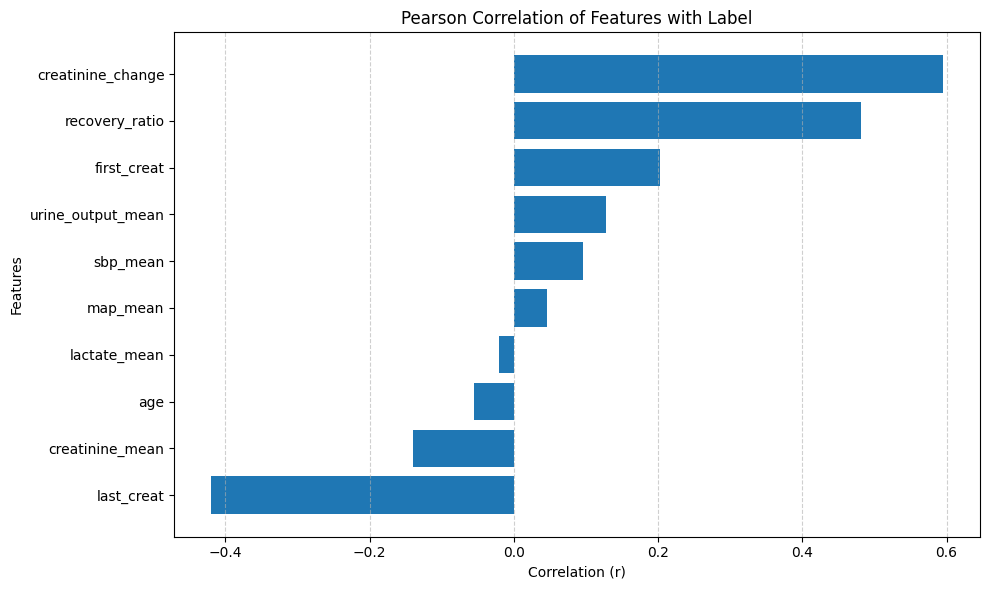

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
feature_cols = [
    'creatinine_mean', 'creatinine_change', 'first_creat', 'last_creat',
    'urine_output_mean', 'recovery_ratio', 'map_mean', 'sbp_mean',
    'lactate_mean', 'age'
]
corrs = []
for col in feature_cols:
    r, p = pearsonr(df[col], df['label_binary'])
    corrs.append([col, r])
corr_df = pd.DataFrame(corrs, columns=['Feature','Pearson_r'])
corr_df = corr_df.sort_values(by='Pearson_r', ascending=True)
plt.figure(figsize=(10,6))
plt.barh(corr_df['Feature'], corr_df['Pearson_r'])
plt.title("Pearson Correlation of Features with Label")
plt.xlabel("Correlation (r)")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler
numeric_cols = [
    'creatinine_mean', 'creatinine_change', 'first_creat', 'last_creat',
    'urine_output_mean', 'recovery_ratio', 'map_mean', 'sbp_mean',
    'lactate_mean', 'age'
]

scaler = StandardScaler()

df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df_scaled.head()


,subject_id,urine_output_mean,creatinine_mean,first_creat,last_creat,recovery_ratio,recovery_class,map_mean,sbp_mean,lactate_mean,age,label,creatinine_change,label_binary
0,10033740,1.561830,-0.745636,-0.518097,-0.691493,-0.076663,Improving,-0.221882,-0.098311,-0.034807,0.865448,Improving_Recovered,0.178575,1
1,14378086,-0.945703,0.333176,-0.252387,-0.367147,-0.141715,Improving,-0.032532,-0.122140,0.020333,0.315923,Improving_Recovered,0.116145,1
2,10653347,-0.412577,-0.246572,-0.518097,0.605890,-0.748164,Worsening,-0.057232,0.086851,-0.037686,-0.783129,Worsening,-1.070030,0
3,18687772,-0.231395,0.246708,-0.717380,0.476152,-0.830365,Worsening,0.030092,0.646707,-0.035947,-0.302294,Worsening,-1.132460,0
4,13191989,-0.004759,-0.820795,-0.916663,-0.496886,-0.745766,Worsening,0.470616,0.150484,0.058238,-2.775159,Worsening,-0.383297,0


In [14]:
X = df_scaled[numeric_cols]
y = df_scaled['label_binary']


c:\Users\AISWARYA\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:34:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                     Accuracy  Precision    Recall  F1 Score   ROC-AUC
Logistic Regression  0.798198   0.789474  0.812274  0.800712  0.870179
Random Forest        0.787387   0.793358  0.776173  0.784672  0.840597
Gradient Boosting    0.801802   0.822394  0.768953  0.794776  0.864322
XGBoost              0.785586   0.803846  0.754513  0.778399  0.849077


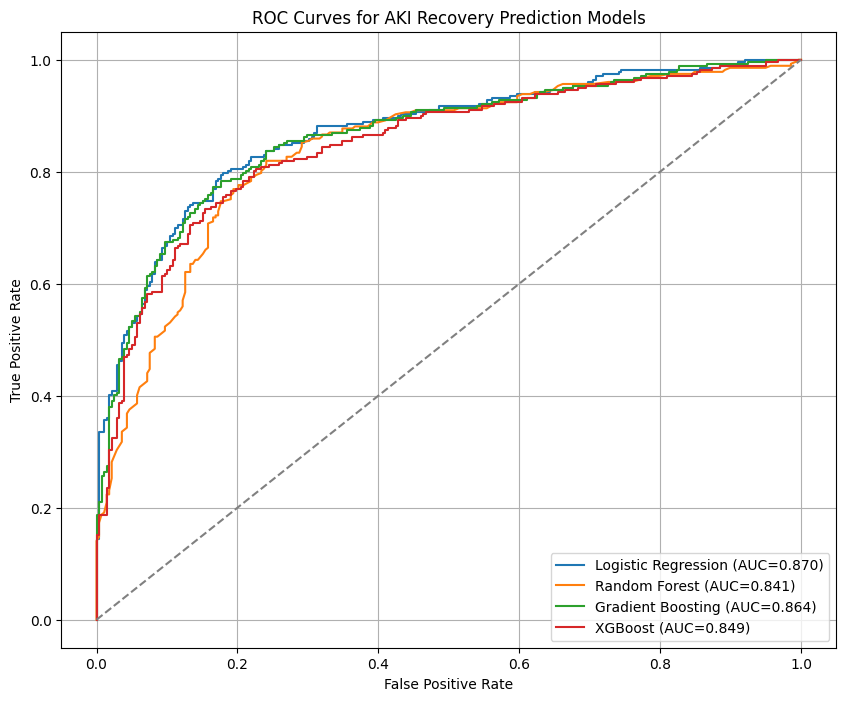

In [19]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

import matplotlib.pyplot as plt
import seaborn as sns


df['label'] = df['label'].astype(str).str.replace(',', '').str.strip()
df['label_binary'] = df['label'].map({'Improving_Recovered': 1, 'Worsening': 0})

features = [
    'creatinine_mean',  'first_creat', 
    'urine_output_mean', 'map_mean', 'sbp_mean',
    'lactate_mean', 'age'
]

X = df[features]
y = df['label_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(n_estimators=300, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(
        objective='binary:logistic', eval_metric='logloss',
        random_state=42, use_label_encoder=False
    )
}

results = {}

for name, model in models.items():
    X_train_used = X_train_scaled if name != "Random Forest" else X_train
    X_test_used  = X_test_scaled if name != "Random Forest" else X_test
    
    model.fit(X_train_used, y_train)
    y_pred = model.predict(X_test_used)
    y_prob = model.predict_proba(X_test_used)[:, 1]
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob)
    }

results_df = pd.DataFrame(results).T
print(results_df)

plt.figure(figsize=(10, 8))

for name, model in models.items():
    X_test_used = X_test_scaled if name != "Random Forest" else X_test
    y_prob = model.predict_proba(X_test_used)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_prob):.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title("ROC Curves for AKI Recovery Prediction Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()
